## 필요 모듈 불러오기

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Model v1

## 데이터 함수

In [17]:
def load_train_data_v1(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration_1/rock_scissor_paper_v1"
(x_train_1, y_train_1)=load_train_data_v1(image_dir_path)
x_train_norm_1 = x_train_1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_1 shape: {}".format(x_train_1.shape))
print("y_train_1 shape: {}".format(y_train_1.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_1 shape: (300, 28, 28, 3)
y_train_1 shape: (300,)


In [18]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test_data/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_data/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/test_data/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration_1/rock_scissor_paper_v1"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [19]:
x_train_1 # 이미지 데이터
y_train_1 # Label 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

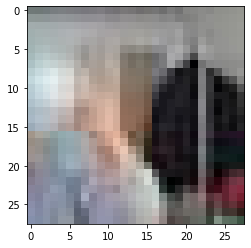

In [20]:
plt.imshow(x_train_1[1],cmap=plt.cm.binary)
plt.show()

## 학습 네트워크 설계

In [21]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

## 채널 수 설정하기 (이미 채널수가 3으로 설정되어있어 의미가 없다)

In [23]:
print("Before Reshape - x_train_1_norm shape: {}".format(x_train_norm_1.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped_1=x_train_norm_1.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3) #컬러 사진이므로 3

print("After Reshape - x_train_1_reshaped shape: {}".format(x_train_reshaped_1.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_1_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_1_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


## 데이터 학습

In [24]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped_1, y_train_1, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.4200
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0194 - accuracy: 0.6633
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.7633
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.7533
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7900
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8500
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8667
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8933
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9667
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9933


## 성능 확인

In [25]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.6438 - accuracy: 0.3333
test_loss: 1.643816590309143 
test_accuracy: 0.3333333432674408


### 적중률 33.3%로 찍는것과 다름이 없는 기적적인 성과를 보여준다

## 추론

In [26]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.05857518 0.38417047 0.5572543 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [0.09653225 0.32001835 0.5834494 ]
라벨: 1, 예측결과: 2


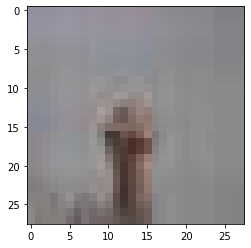

예측확률분포: [0.0719293  0.32402992 0.6040408 ]
라벨: 0, 예측결과: 2


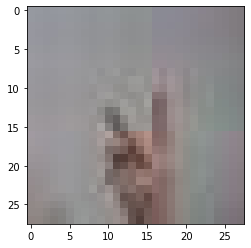

예측확률분포: [0.09545367 0.2920189  0.6125274 ]
라벨: 1, 예측결과: 2


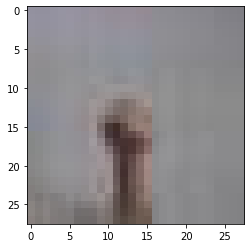

예측확률분포: [0.05489084 0.2914372  0.6536719 ]
라벨: 0, 예측결과: 2


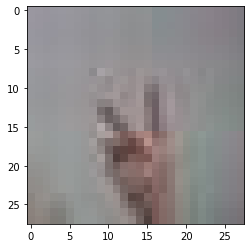

예측확률분포: [0.05525872 0.3035564  0.6411849 ]
라벨: 0, 예측결과: 2


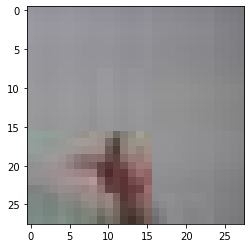

In [27]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 성능 향상: Model 2

##  변경사항: 학습 데이터량, 학습 횟수, Dense값 조정


In [28]:
def load_train_data_v2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1800   # 기존 300장이던 데이터량을 1800장으로 증가
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration_1/rock_scissor_paper_v2"
(x_train, y_train)=load_train_data_v2(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1800 입니다.
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


In [30]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3) #컬러 사진이므로 3

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (1800, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1800, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


## model2 구성

## 손글씨 데이터와 비교했을때, 이미지가 더욱 복잡한것을 고려하여 Conv2d와 Dense값 상향

In [37]:
model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(160, (3,3), activation='relu', input_shape=(28,28,3))) 
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.Conv2D(160, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [38]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 160)       4480      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 160)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 160)       230560    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 160)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               512128    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

## 학습횟수 조정: 150 epochs일때 적중률 62%, 200 epochs일때 적중률 58%로 150~200구간 사이에서부터 과적합(Overfitting)이 일어나는것으로 예상됨

In [62]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train_reshaped, y_train, epochs=150) #학습횟수 증가 (10 -> 150)

Epoch 1/150
57/57 [==============================] - 0s 3ms/step - loss: 6.6095e-08 - accuracy: 1.0000
Epoch 2/150
57/57 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9939
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9911
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 5/150
57/57 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 7.0083e-05 - accuracy: 1.0000
Epoch 7/150
57/57 [==============================] - 0s 3ms/step - loss: 1.4681e-05 - accuracy: 1.0000
Epoch 8/150
57/57 [==============================] - 0s 3ms/step - loss: 8.9701e-06 - accuracy: 1.0000
Epoch 9/150
57/57 [==============================] - 0s 3ms/step - loss: 6.8581e-06 - accuracy: 1.0000
Epoch 10/150
57/57 [==============================] - 0s 3ms/step - loss: 5.8036e-06 - ac

57/57 [==============================] - 0s 3ms/step - loss: 1.9491e-07 - accuracy: 1.0000
Epoch 81/150
57/57 [==============================] - 0s 3ms/step - loss: 1.8835e-07 - accuracy: 1.0000
Epoch 82/150
57/57 [==============================] - 0s 3ms/step - loss: 1.8385e-07 - accuracy: 1.0000
Epoch 83/150
57/57 [==============================] - 0s 3ms/step - loss: 1.7868e-07 - accuracy: 1.0000
Epoch 84/150
57/57 [==============================] - 0s 3ms/step - loss: 1.7352e-07 - accuracy: 1.0000
Epoch 85/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6888e-07 - accuracy: 1.0000
Epoch 86/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6471e-07 - accuracy: 1.0000
Epoch 87/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6000e-07 - accuracy: 1.0000
Epoch 88/150
57/57 [==============================] - 0s 3ms/step - loss: 1.5537e-07 - accuracy: 1.0000
Epoch 89/150
57/57 [==============================] - 0s 3ms/step - loss: 1.5

In [63]:
test_loss, test_accuracy = model2.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.7287 - accuracy: 0.6000
test_loss: 4.728729724884033 
test_accuracy: 0.6000000238418579


## v1의 적중률 33.3%와 비교했을때 적중률이 28.7% 향상되었다.

## 추론

In [64]:
predicted_result_2 = model2.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels_2 = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result_2[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels_2[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.6085369e-11 1.9044685e-01 8.0955309e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [1.3486347e-04 9.9986517e-01 4.9136403e-11]
라벨: 1, 예측결과: 2


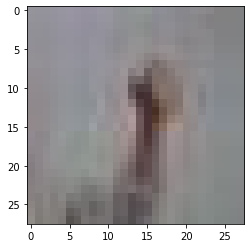

예측확률분포: [2.4771373e-04 2.1258151e-04 9.9953973e-01]
라벨: 0, 예측결과: 2


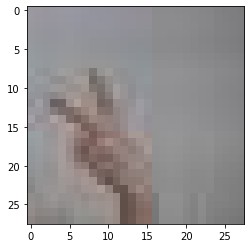

예측확률분포: [9.9997199e-01 1.3724831e-09 2.7970715e-05]
라벨: 0, 예측결과: 2


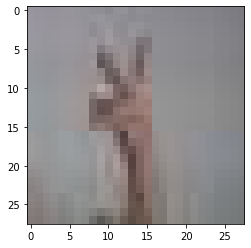

예측확률분포: [9.9997783e-01 2.2165097e-05 8.8227975e-10]
라벨: 1, 예측결과: 2


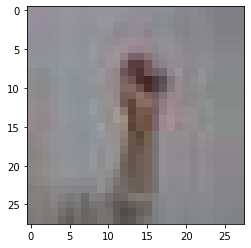

예측확률분포: [1.7222785e-08 7.0724618e-06 9.9999297e-01]
라벨: 0, 예측결과: 2


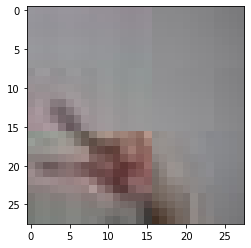

In [65]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels_2[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result_2[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels_2[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고

'''
#### 1. 첫번째 프로젝트였는데 제법 난이도가 있다고 느껴졌다. 
#### 2. LMS Exp1 노드에서 테스트셋을 구성하는 법을 알려주는 가이드가 없어 좀 애를 먹었었다. (테스트셋 구성법은 Exp2에서 나왔다...) 
#### 결국 기존 학습 데이터 load 함수를 살짝 응용하여 테스트 데이터 load 함수를 만들고 다른분의 사진을 전처리하여 테스트셋 구성을 하였다.
#### 3. 첫 모델에서 적중률 33.3%가 나왔을때 어이가 없었다. 아무리 깡통 AI여도 그렇지 찍는것과 다름없는 적중률을 보여주다니...
#### 4. 적중률을 높이기위해 데이터양을 늘려보기도하고, Hyper-parameter (Dense, Conv2d)를 이리저리 조정해봤다. 
#### 5. Dense, Conv2d값을 어떤식으로 조정하면 좋을지 궁리하다가 손글씨 데이터에 비해 가위바위보 데이터는 더욱 복잡한 이미지라는것을 고려하여 Conv2d 값을 대폭 상향시켰더니 비약적으로 상승된 적중률을 보여줬다
#### 6. 이렇게 간단한 머신을 만들어보는데도 낑낑거렸는데 앞으로 배워야할게 참으로 많다는것이 새삼 느껴진다.